<a href="https://colab.research.google.com/github/dlskawns/RecSys_and_Retrieval_Study/blob/main/8_11_DeepFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Factorization Machine (DeepFM)

중국의 화웨이에서 연구 개발한 모델  
추천시스템의 CTR을 예측하기 위한 모델

* Second order interaction 이상으로 학습이 가능함.
  * FM에서 두 개의 feature 이상으로는 학습이 불가능했음
  * 수식에서 이미 두 개의 feature까지만 고려를 했기 때문
  * 세 개 이상의 features에 대해서는 불가능했음
* 구글의 wide and deep에서 차용했으나, feature engineering이 필요치 않음




## DeepFM의 원리

$\hat y = sigmoid(y_{FM} + u_{DNN})$

위 식과 같이 FM을 구하고, DNN을 구한 뒤 이를 최종적으로 더해준 다음에 Sigmoid를 취해주는 방식

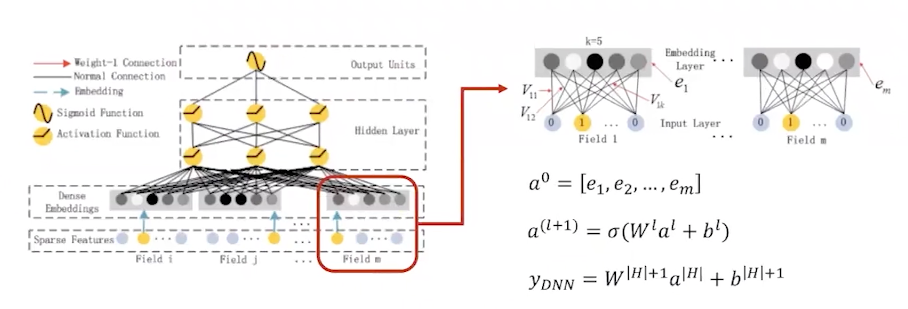

### DeepFM의 DNN 파트

* sparse features는 one hot 상태
* Embedding layer에서 각 파라미터로 임베딩 됨.
  * k차원의 factor로 임베딩이 된 뒤 모두 concat을 함
  * field가 m개라면 k * m의 길이의 노드가 생기게 됨
  * 정확히는 $\sum$factor 차원(k) * field별 요소개수(Ex: gender=2, userid=100, itemid = 100)
* 위와같이 볼 때, 최종적으로는 그림상의 노드와 같이 5개 차원으로 나눠질 때, 
  * 첫번째 임베딩은 $k*N_G$
  * 두번째 임베딩은 $k*N_U$
  * 세번째 임베딩은 $k*N_I$  
* 해당 임베딩에 대한 파라미터 조정은 linear한 FM 부분이나 딥러닝 부분이나 함께 업데이트됨
* DNN 파트의 마지막 레이어인 $y_{DNN}$에서 activation function이 없는 이유는 나온 결과값과 $y_{FM}$의 결과값의 합에 sigmoid를 취해야 하기 때문



### DeepFM의 하이퍼파라미터

* embedding layer -> 몇개의 차원으로 하느냐에 따라서도 영향력이 달라질 수 있음
* activation function -> sigmoid, relu, tanh
* layer 개수 및 unit 개수 
* optimizer
* batch norm
* dropout



* 깊은 레이어라고 좋지 않다 -> 특히 추천모델에서는 그렇게까지 깊은 모델을 현업에서 사용하지 않는 경우를 흔히 볼 수 있다.